<a href="https://colab.research.google.com/github/IngridSchieven/Final-assignment---CO2-emissions---Ingrid/blob/main/FA_Q1_CO2_Biggest_predictor_large_CO2output_0722Ingrid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Assignment
# Q1 What is the biggest predictor of a large CO2 output per capita of a country?

# 1: Biggest predictor of CO2 output
# To determine this you may want to consider things like 
# GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.

# Your answer can also be a specific combination of certain factors.

In [ ]:
# Stap 1: Onderzoeksvraag begrijpen en indien nodig aanvullend info zoeken

# Zoek de grootste veroorzaker van CO2 uitstoot. 
# Welke data heeft de meeste correlatie met de CO2 uitstoot per hoofd van de bevolking per land

In [ ]:
# Stap 2: Relevante dataset(s) zoeken!

# De Kaya index geeft veel relevante info en houdt al rekening met de GDP en de veranderingen in populatie
url = 'https://ourworldindata.org/grapher/kaya-identity-co2?time=1960..latest'

# Onderstaande datasets geeft misschien ook nog relevante info, maar even bewaren.
url2 = 'https://ourworldindata.org/grapher/road-vehicles-per-1000-inhabitants-vs-gdp-per-capita' #motor vehicles per 1000
url3 = 'https://ourworldindata.org/grapher/co-emissions-per-capita?tab=chart&stackMode=relative&time=1992..2020' #CO2 emissions per capita %
url4 = 'https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions' #CO2 
url5 = 'https://ourworldindata.org/grapher/co2-emissions-and-gdp?time=2008..2020&country=~OWID_WRL' #CO2 versus GDP


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table
%precision 2

'%.2f'

In [ ]:
# Stap 3: Dataset onderzoeken
# Geeft de Kaya index antwoorden op de onderzoeksvraag? Ja!
# GDP en Populatie correlatie met CO2 onderzoeken/vergelijken

In [ ]:
#import and explore dataset
df = pd.read_csv('/content/kaya-identity-co2.csv')
#explore df
df.info()

In [ ]:
df.head(5)

,Entity,Code,Year,Annual CO2 emissions,Annual CO2 emissions per unit energy (kg per kilowatt-hour),Annual CO2 emissions per GDP (kg per $PPP),Energy per GDP (kWh per $),GDP per capita,417485-annotations,Population (historical estimates)
0,Afghanistan,AFG,1965.0,1006917.0,NaN,0.0710,NaN,1290.0,NaN,9956318.0
1,Afghanistan,AFG,1966.0,1091159.0,NaN,0.0762,NaN,1272.0,NaN,10174840.0
2,Afghanistan,AFG,1967.0,1281865.0,NaN,0.0870,NaN,1277.0,NaN,10399936.0
3,Afghanistan,AFG,1968.0,1223391.0,NaN,0.0802,NaN,1290.0,NaN,10637064.0
4,Afghanistan,AFG,1969.0,941232.0,NaN,0.0608,NaN,1278.0,NaN,10893772.0


In [ ]:
#cleanup dataset
# Quick overview of missing data:
for column in df.columns:
    aantal_missing = np.sum(df[column].isnull())
    print('{} - {}'.format(column, aantal_missing))

In [ ]:
#cleanup dataset
#drop columns
df1 = df.drop(columns=['417485-annotations', 'Code', 'Annual CO2 emissions per unit energy (kg per kilowatt-hour)',
       'Annual CO2 emissions per GDP (kg per $PPP)',
       'Energy per GDP (kWh per $)'])
#rename column
df2 = df1.rename(columns= {'Population (historical estimates)': 'Population', })

In [ ]:
df2.sample(5)

In [ ]:
#drop missing numbers
df3 = df2.dropna()
df3.sample(5)

,Entity,Year,Annual CO2 emissions,GDP per capita,Population
2493,Chad,1987.0,197856.0,663.000000,5412844.0
2138,Cambodia,1974.0,47632.0,1049.000000,7533332.0
8526,Moldova,1989.0,38695150.0,10288.000000,4347870.0
2745,Colombia,1997.0,64496528.0,8952.472656,37723803.0
617,Armenia,1991.0,7288292.0,8141.670898,3505249.0


Text(0.5, 1.0, 'GDP vs. Annual CO2 emissions')

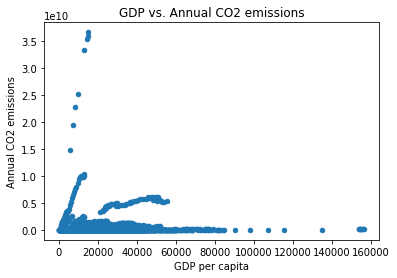

In [ ]:
df3.plot(kind='scatter', x='GDP per capita', y= 'Annual CO2 emissions')
plt.title('GDP vs. Annual CO2 emissions')
# very weak correlations appear

Text(0.5, 1.0, 'Population vs. Annual CO2 emissions')

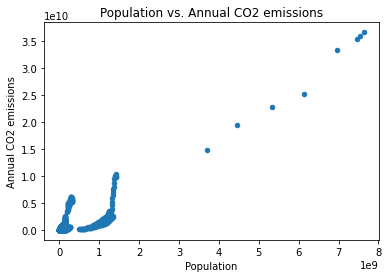

In [ ]:
df3.plot(kind='scatter', x='Population', y= 'Annual CO2 emissions')
plt.title('Population vs. Annual CO2 emissions')
# very strong correlation appears

In [ ]:
#check with .corr()
df3.corr()

,Year,Annual CO2 emissions,GDP per capita,Population
Year,1.000000,0.056677,0.283775,0.049366
Annual CO2 emissions,0.056677,1.000000,0.106551,0.888515
GDP per capita,0.283775,0.106551,1.000000,-0.013292
Population,0.049366,0.888515,-0.013292,1.000000


In [ ]:
#results df3.corr()
# very strong correlation CO2 versus Population > 0.88
# very weak correlation CO2 versus GDP > 0.10

# meaning of this coefficient: 
# If we wish to label the strength of the association, for absolute values of r, 0-0.19 is regarded as very weak, 
# 0.2-0.39 as weak, 0.40-0.59 as moderate, 0.6-0.79 as strong and 0.8-1 as very strong correlation, 
# but these are rather arbitrary limits, and the context of the results should be considered.

In [ ]:
# further clean up and improvements of plot Population
# remove outliers
# add linear regression
# add titel, labels, legend, etc.

In [ ]:
# first step: remove outliers
# check Year > 1989 
# check annual CO2 emission - values
# delete Entity 'Barbados'

df4 = df3[df3['Year'] > 1999]
df5 = df4[df4['Annual CO2 emissions'] > 626544.0]
df6 = df5[df5.Entity != 'Barbados']
df7 = df6[df6.Entity != 'World']

In [ ]:
#just currious what figures a World plot give: HUGE overall correlation!!
df_World = df3[df3.Entity == 'World']
df_World
df_World.corr()

,Year,Annual CO2 emissions,GDP per capita,Population
Year,1.000000,0.990340,0.982257,0.999924
Annual CO2 emissions,0.990340,1.000000,0.994738,0.990071
GDP per capita,0.982257,0.994738,1.000000,0.982604
Population,0.999924,0.990071,0.982604,1.000000


Text(0.5, 0, 'Population growth')

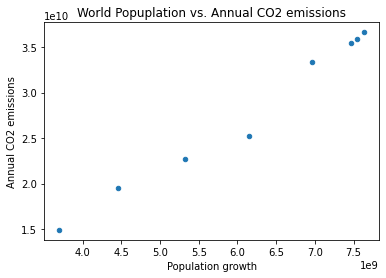

In [ ]:
#World plot
df_World.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
plt.title('World Popuplation vs. Annual CO2 emissions')
plt.xlabel('Population growth')
#plt.ylabel('')


In [ ]:
# correlation df7 (cleaned op dataset)
df7.corr()

,Year,Annual CO2 emissions,GDP per capita,Population
Year,1.000000,0.025518,0.120443,0.016467
Annual CO2 emissions,0.025518,1.000000,0.113651,0.746020
GDP per capita,0.120443,0.113651,1.000000,-0.067884
Population,0.016467,0.746020,-0.067884,1.000000


Text(0.5, 0, 'Population growth')

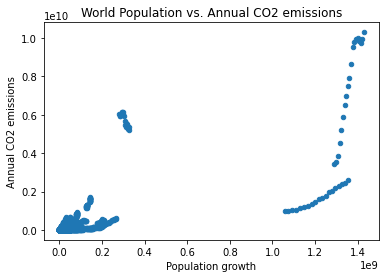

In [ ]:
# see what this  plot looks like:
df7.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
plt.title('World Population vs. Annual CO2 emissions')
plt.xlabel('Population growth')
#plt.ylabel('')


Text(0.5, 0, 'Population growth')

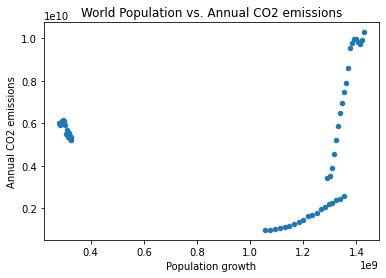

In [ ]:
# df8 only big pop countries > 270000000 China, India, United States
df8=df7[df7['Population'] > 270000000.0]
df8.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
plt.title('World Population vs. Annual CO2 emissions')
plt.xlabel('Population growth')
#plt.ylabel('')

Text(0.5, 0, 'Population growth')

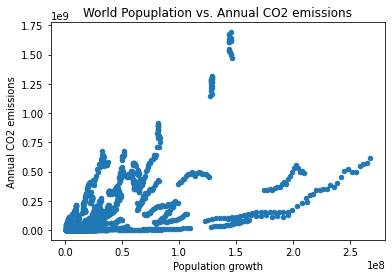

In [ ]:
# df9 without big countries
df9=df7[df7['Population'] < 270000000.0]
df9.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
plt.title('World Popuplation vs. Annual CO2 emissions')
plt.xlabel('Population growth')
#plt.ylabel('')

In [ ]:
df9.corr()
#corr CO2 > Pop begins to look weaker, still strong with 0.58

,Year,Annual CO2 emissions,GDP per capita,Population
Year,1.000000,0.022924,0.120979,0.044667
Annual CO2 emissions,0.022924,1.000000,0.244738,0.581204
GDP per capita,0.120979,0.244738,1.000000,-0.112368
Population,0.044667,0.581204,-0.112368,1.000000


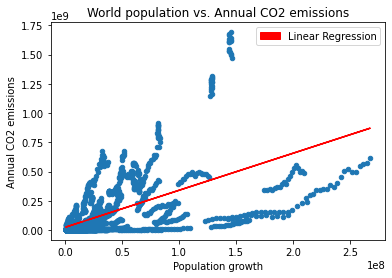

In [ ]:
# Population Plot df9 without China, India, United States
# add reg line
# theorie: Linear regression uses the relationship between the data-points to draw a straight line through all them.
# This line can be used to predict future values.

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

#df3.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
x = np.array(df9['Population']).reshape(-1,1)
y = df9['Annual CO2 emissions']

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions

ax = df9.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
plt.plot(x, Y_pred, color = 'red')

plt.title('World population vs. Annual CO2 emissions')
plt.xlabel('Population growth')
#plt.ylabel('')

red_path = mpatches.Patch(color='red', label= 'Linear Regression')
plt.legend(loc='best', handles=[red_path])


#plt.grid()
plt.show()

<Figure size 1080x720 with 0 Axes>

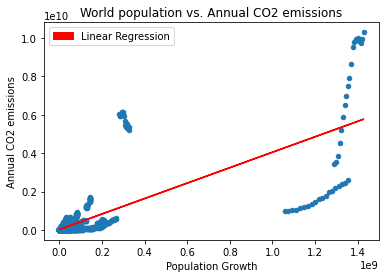

In [ ]:
# Population Plot df7
# add reg line
# theorie: Linear regression uses the relationship between the data-points to draw a straight line through all them.
# This line can be used to predict future values.

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches

plt.figure(figsize=(15, 10))
#df3.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
x = np.array(df7['Population']).reshape(-1,1)
y = df7['Annual CO2 emissions']

linear_regressor = LinearRegression()  
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)  # make predictions

ax = df7.plot(kind='scatter', x = 'Population', y = 'Annual CO2 emissions')
plt.plot(x, Y_pred, color = 'red')

plt.title('World population vs. Annual CO2 emissions')
plt.xlabel('Population Growth')
#plt.ylabel('')

red_path = mpatches.Patch(color='red', label= 'Linear Regression')
plt.legend(loc='best', handles=[red_path])


#plt.grid()
plt.show()

In [ ]:
# df maken die inzoomt op cars per capita
# ...maar bezit van auto's is natuurlijk direct gevolg van populatiegroei, dus niet relevant!
# niet verder uitgewerkt!!

#import df
df_cars = pd.read_csv('/content/road-vehicles-per-1000-inhabitants-vs-gdp-per-capita.csv')

#explore df
#df_cars.info()
df_cars.sample(10)

df_cars1 = df_cars['2015'] > 1965

In [ ]:
# Conclusion: The biggest predictor of a large CO2 outpout is the growth of the world population